### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots, show
import scipy

### Simulating a 2 dimensional data:

In [2]:
np.random.seed(42)
X = 2*np.random.randn(1000,1)
Y = 10 + 2*X + np.random.randn(1000,1)

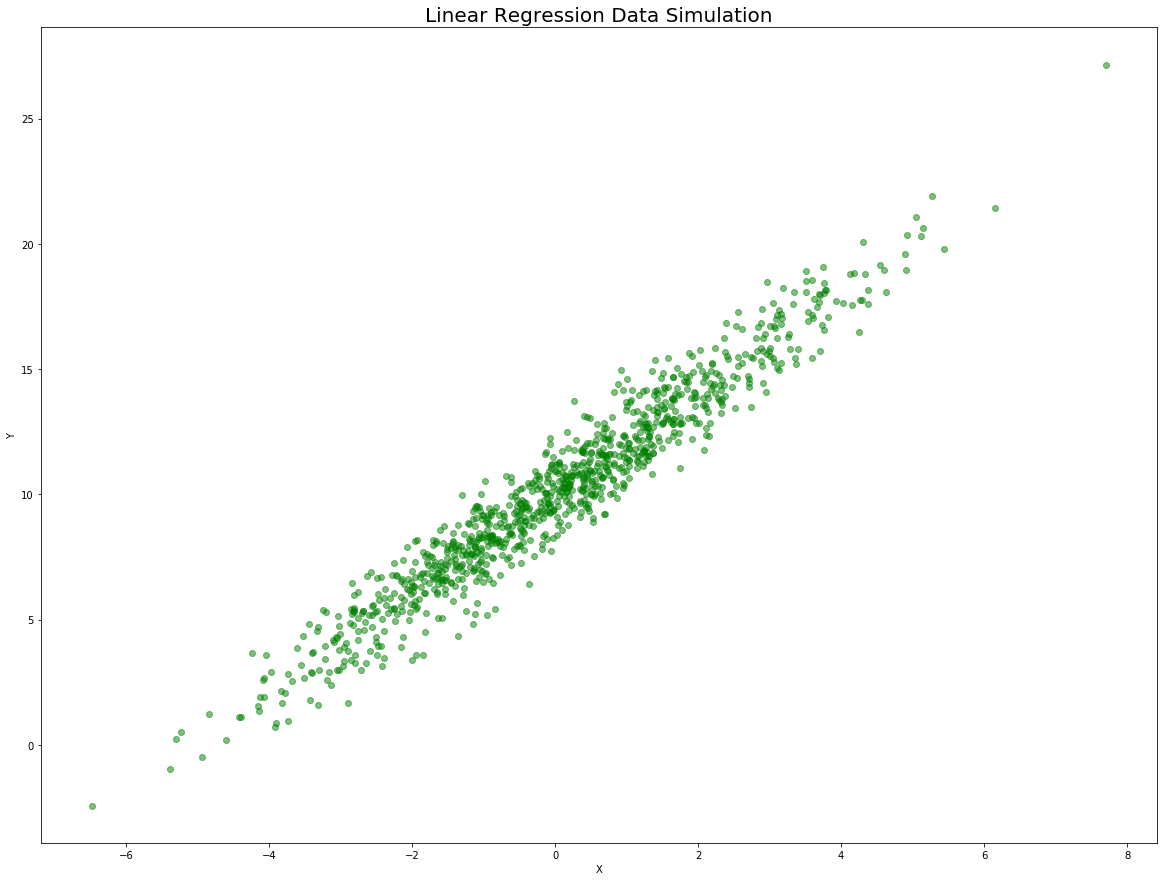

In [3]:
plt.figure(figsize=(20,15))
plt.axis(aspect='equal')
plt.axes(xlabel="X",ylabel="Y")
plt.title('Linear Regression Data Simulation', fontsize=20)
plt.scatter(X,Y, marker='o', c='g', alpha = 0.5)
plt.show()

In [13]:
def calculate_GD(X_p,Y_p,theta):
    '''Calculate Gradient Descent'''
    m = X_p.shape[0]
    grads = (2/m) * X_p.T.dot(X_p.dot(theta)-Y_p)
    return grads

In [14]:
t0,t1 = 5,50
def learning_schedule(t):
    return t0/(t+t1)

In [29]:
def process_stochasticGD(X_p,Y_p,m,epoch,theta):
    for i in range(m):
        random_idx = np.random.randint(m)
        xi = X_p[random_idx:random_idx + 1]
        yi = Y_p[random_idx:random_idx + 1]
        grads = calculate_GD(xi,yi,theta)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta*grads
    return theta

In [48]:
def run_StochasticGD(epochs):
    X_p = np.c_[np.ones((1000,1)),X]
    Y_p = Y.copy()
    m = X_p.shape[0]
    np.random.seed(41)
    theta = np.random.randn(2,1)
    theta_result = []
    for epoch in range(epochs):
        theta_result = process_stochasticGD(X_p,Y_p,m,epoch, theta)
    print("The best theta for Stochastic Gradient Descent: \n Interceptor: {} \n Slope:{}".format(theta_result[0],theta_result[1]))

In [49]:
run_StochasticGD(50)

The best theta for Stochastic Gradient Descent: 
 Interceptor: [1.62721595] 
 Slope:[1.08500825]


In [50]:
from sklearn.linear_model import SGDRegressor
sgdReg = SGDRegressor(max_iter = 1000, penalty=None, eta0=0.1)
sgdReg.fit(X,Y.ravel())
print("The best theta by Scikit-Learn Batch Gradient Descent Algorithm: \n Intercept: {} \n Slope:{}\n\n".format(sgdReg.intercept_, sgdReg.coef_))

The best theta by Scikit-Learn Batch Gradient Descent Algorithm: 
 Intercept: [10.0549003] 
 Slope:[1.94483077]


